# Plot multicollinearity

In [1]:
from mrp7pred.utils import plot_multicollinearity
from mrp7pred.feats.selection import _remove_similar_features, _remove_all_zero_features
import pandas as pd
import numpy as np

# Autoreload modules
%load_ext autoreload
%autoreload 2

In [2]:
df_feats = pd.read_csv("./nsc_substrate_700__full_features_831_20210306-094650.csv", index_col=0)
df_feats_num = df_feats.drop(["name", "smiles", "label"], axis=1)
df_feats_num.dropna(axis=0, inplace=True, how='any')
support_similar, _ = _remove_similar_features(df_feats_num, threshold=0.9)
support_zero, _ = _remove_all_zero_features(df_feats_num)
support = np.intersect1d(support_similar, support_zero)
print(support.shape)
df_feats_removed = df_feats_num.iloc[:, support]
df_feats_num_no_zero = df_feats_num.iloc[:, support_zero]
df_feats_num_no_zero.shape, df_feats_removed.shape

Calculating correlation matrix ... Done!
Creating correlation graph ... Done!
Selected 437/828 features
Remove features with all zeros ... Done!
Selected 694/828 features
(303,)


((547, 694), (547, 303))

In [3]:
sum(df_feats_num_no_zero.isnull().sum())

0

In [105]:
mask = (df_feats_num_no_zero == 0).all()
np.where(~mask)[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [106]:
corr_matrix = df_feats_num_no_zero.corr(method="pearson")

In [107]:
corr_matrix.iloc[0, :16]

rdk_FractionCSP3                1.000000
rdk_HeavyAtomCount              0.275021
rdk_HeavyAtomMolWt              0.275331
rdk_NHOHCount                   0.241284
rdk_NOCount                     0.325235
rdk_RingCount                   0.003571
rdk_NumAliphaticCarbocycles     0.312910
rdk_NumAliphaticHeterocycles    0.403024
rdk_NumAliphaticRings           0.483050
rdk_NumAromaticCarbocycles     -0.547779
rdk_NumAromaticHeterocycles    -0.340939
rdk_NumAromaticRings           -0.614753
rdk_NumHAcceptors               0.320836
rdk_NumHDonors                  0.256728
rdk_NumHeteroatoms              0.307436
rdk_NumRotatableBonds           0.347540
Name: rdk_FractionCSP3, dtype: float64

In [108]:
for index, row in corr_matrix.iterrows():
    if row.isnull().any():
        for idx, ele in enumerate(row):
            print(idx, ele)
        break

In [109]:
df2 = pd.DataFrame(np.array([[0, 2, 3], [0, 5, 6], [0, 8, 9]]), columns=['a', 'b', 'c'])
df2.corr(method="pearson")

,a,b,c
a,NaN,NaN,NaN
b,NaN,1.0,1.0
c,NaN,1.0,1.0


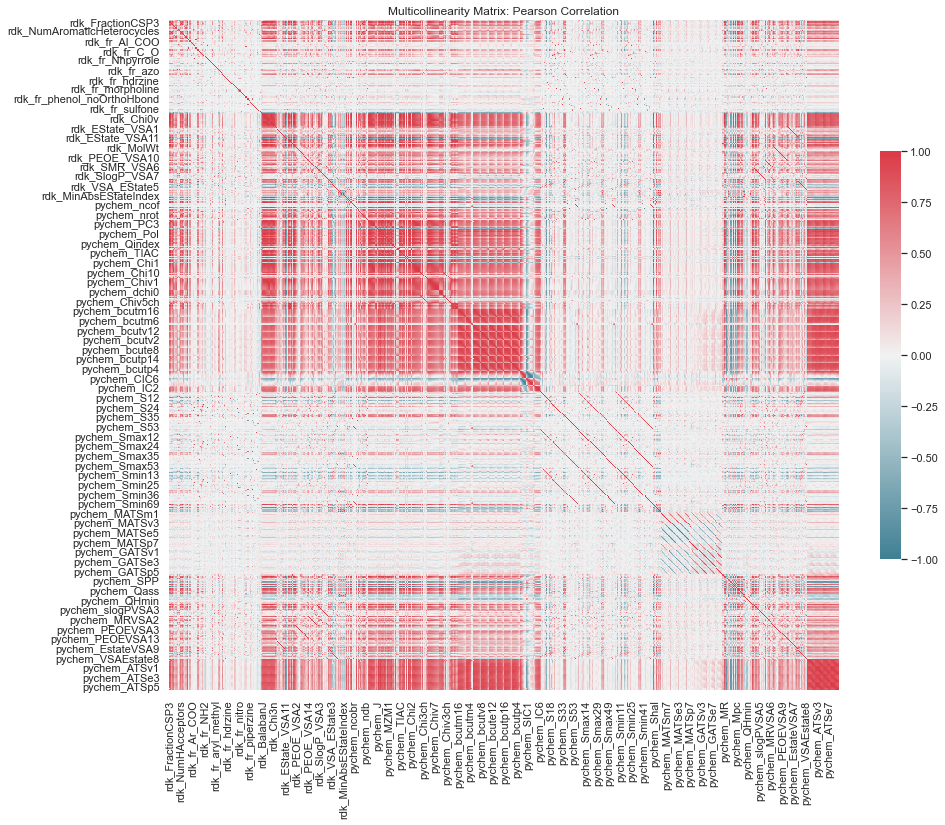

In [4]:
# before selection
plot_multicollinearity(df_feats_num_no_zero, figsize=(15, 15), filename="full_feature_nsc_547_corr")

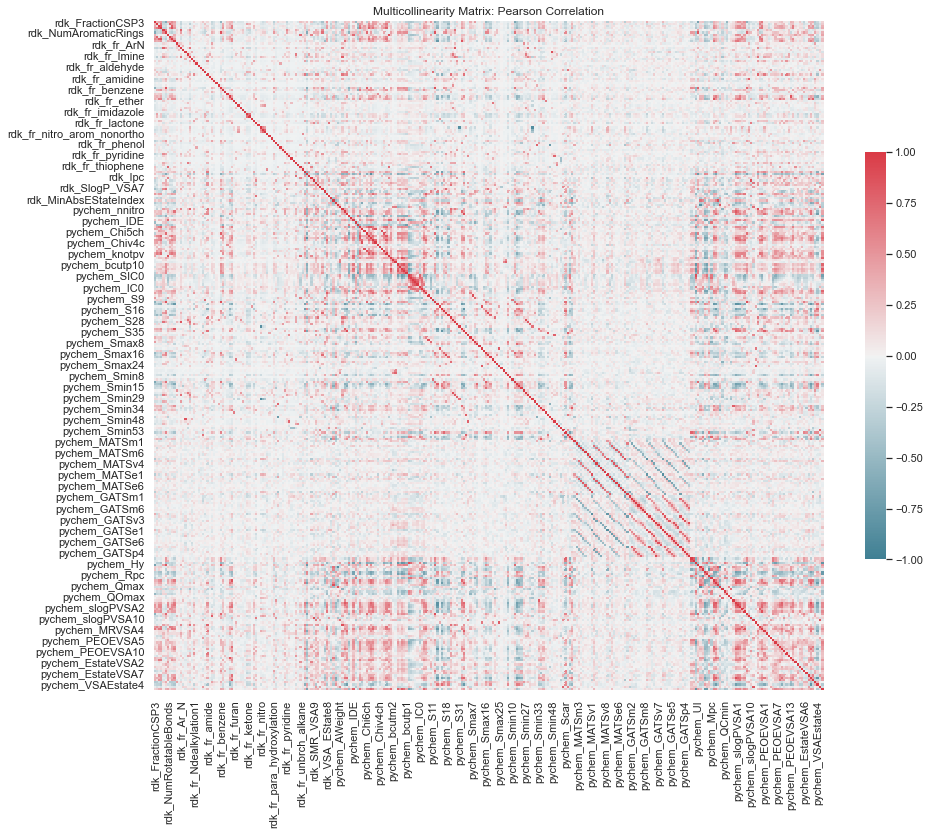

In [114]:
# after selection
plot_multicollinearity(df_feats_removed, figsize=(15, 15), filename="selected_feature_nsc_547_corr")